In [1]:
import pandas as pd
import numpy as np

import multidict as multidict

import datetime
from dateutil.relativedelta import relativedelta

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


#from PIL import Image
from wordcloud import WordCloud

import multidict as multidict

import os

import spacy

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # per stampare tutti gli output

In [2]:
# Memoriale Cavour GOOGLE MAPS

GMcav = pd.read_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Memoriale Cavour/Maps_Cavour.xlsx", usecols = ["review_datetime_utc", "review_text", "review_rating"]) # lettura dataset


# 1 - pulizia traduzione "dopo"
delimiter="(Originale)"

x = GMcav["review_text"].str.split(delimiter, expand=True)
GMcav["testo_clean2"] = x[0]

GMcav = GMcav.drop("review_text", axis=1)



# 2 - pulizia traduzione "prima"
delimiter="(Traduzione di Google)"

GMcav["testo"] = GMcav["testo_clean2"].str.split(delimiter).str[-1]

GMcav = GMcav.drop("testo_clean2", axis=1)

#mautoGO.to_excel("/Users/Emanuele/Desktop/TesiMaster/Dataset/Mauto/Google/mautoGO_clean.xlsx")

In [3]:
# pulizia DATA GOOGLE MAPS

delimiter = " "

# separazione data dall'ora
GMcav["data"] = GMcav["review_datetime_utc"].str.split(delimiter).str[0]

GMcav = GMcav.drop("review_datetime_utc", axis=1)

GMcav = GMcav.drop("review_rating", axis=1)
GMcav = GMcav.drop("data", axis=1)


GMcav.head(10)

,testo
0,"Interessante e molto ben conservato, consiglia..."
1,Spettacolare! La guida che ci ha accompagnato ...
2,Senza Cavour probabilmente l'Italia non sarebb...
3,Perla del ns paese! Consiglio a tutti di visit...
4,Sono stata soddisfatta . E questa primavera to...
5,"Casa museo, bellissima la prima sala e la came..."
6,Il castello è meritevole e interessante da vis...
7,Una piacevolissima scoperta! Un ringraziamento...
8,Molto interessante
9,"bel parco, rilassante."


In [5]:
# Memoriale Cavour TRIPADVISOR

TAcav = pd.read_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Memoriale Cavour/TripAdvisor_Cavour.xlsx", usecols=["description", "title"]) # lettura dataset

TAcav.head(10)

,title,description
0,Interessante ma non ancora coinvolgente,Plaudo all'impegno della fondazione (la signor...
1,Una visita nella storia,Abbiamo visitato la dimora dei Cavour alla fin...
2,Per un gita fuori porta,Castello molto bello con arredi interessanti ...
3,Villa da vedere,Visita molto istruttiva. Castello ristrutturat...
4,Interessante e divertente (cit.),Castello restaurato da poco. Bella e rilassant...
5,Bella giornata,Il castello e stato restaurato da poco .La pre...
6,Da vedere,Aperto a marzo 2021 dopo un eccellente restaur...
7,"Visita multimediale...Una ""full immersion"" ( s...","Museo recentemente restaurato, dotato di un pe..."
8,Di passaggio,Un castello signorile con un bellissimo parco ...
9,parole parole parole....,Domenica mattina ci siamo recati a Santena per...


In [8]:
'''''

# conversione DATA TRIPDAVISOR

import locale

locale.setlocale(locale.LC_ALL, 'it_IT')

TAcav['data'] = pd.to_datetime(TAcav['data'], format = '%d %B %Y')

TAcav.head(10)

'''''

'it_IT'

,data,titolo,testo,punteggio
0,2022-11-20,Visita di lavoro e di svago.,"Tornato al MAuto dopo anni di assenza, sono ri...",5
1,2022-11-09,Grande delusione,Francamente deludente! Poche le auto di riliev...,2
2,2022-11-05,Eccezionale,Nella zona ospedaliera della città e adiacente...,5
3,2022-11-01,Top,"Favoloso, per tutte le età, ottima organizzazi...",5
4,2022-10-16,Museo automobile,Fantastico i miei bimbi si sono divertiti un s...,5
5,2022-10-03,Eccezionale esperienza,Consilio questa visita che per me è stata fant...,5
6,2022-10-02,Auto che passione!,Abbiamo trascorso un piacevole pomeriggio in q...,5
7,2022-09-18,Imperdibile,Varietà ricchissima di modelli dalle origini f...,5
8,2022-09-15,Da vedere e rivedere,"Una vera meraviglia, vedere da vicino tante au...",5
9,2022-09-04,Tappa fissa,"Situato vicino il ""lingotto"" tappa fissa da vi...",4


In [6]:
# unione colonna "titolo" e "testo" TRIPADVISOR

TAcav['testo'] = TAcav[["title", "description"]].apply(". ".join, axis=1)

TAcav = TAcav.drop("title", axis=1)
TAcav = TAcav.drop("description", axis=1)


TAcav.head(10)

,testo
0,Interessante ma non ancora coinvolgente. Plaud...
1,Una visita nella storia. Abbiamo visitato la d...
2,Per un gita fuori porta. Castello molto bello...
3,Villa da vedere. Visita molto istruttiva. Cast...
4,Interessante e divertente (cit.). Castello res...
5,Bella giornata. Il castello e stato restaurato...
6,Da vedere. Aperto a marzo 2021 dopo un eccelle...
7,"Visita multimediale...Una ""full immersion"" ( s..."
8,Di passaggio . Un castello signorile con un be...
9,parole parole parole..... Domenica mattina ci ...


In [7]:
# UNIONE 2 DATASET GOOGLE MAPS + TRIPADVISOR

Cav = pd.concat([GMcav, TAcav], axis=0)


Cav["testo"] = Cav["testo"].str.strip() # rimozione spazi prima e dopo
Cav["testo"] = Cav["testo"].str.replace(r'[^A-Za-z0-9àèéòìù,.!?;]+\s?', ' ', regex=True) # rimozione menzioni
Cav["testo"] = Cav["testo"].str.replace(r'@[A-Za-z0-9]+\s?', ' ', regex=True) # rimozione menzioni
Cav["testo"] = Cav["testo"].str.replace(r'#[A-Za-z0-9]+\s?', ' ', regex=True) # rimozione hashtag
Cav["testo"] = Cav["testo"].str.replace(r'https*\S+', ' ', regex=True) # rimozione URL
Cav["testo"] = Cav["testo"].str.replace(r'(', ' ', regex=True) # rimozione parentesi
Cav["testo"] = Cav["testo"].str.replace(r')', ' ', regex=True) # rimozione parentesi
Cav["testo"] = Cav["testo"].str.replace(r'...Altro', '', regex=True) # rimozione parentesi
Cav = Cav.dropna() # rimozione righe NaN

# rimozione righe blank
#Cav['testo'].replace("", np.nan, inplace = True)
#Cav.dropna(subset=['testo'], inplace = True)


Cav.head()

Cav.to_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Memoriale Cavour/Export/Cavour.xlsx")

,testo
0,"Interessante e molto ben conservato, consiglia..."
1,Spettacolare! La guida che ci ha accompagnato ...
2,Senza Cavour probabilmente l Italia non sarebb...
3,Perla del ns paese! Consiglio a tutti di visit...
4,Sono stata soddisfatta . E questa primavera to...


In [8]:
MemCav = Cav # copia per poterli confrontare senza dover rilanciare tutto 


# DATA CLEANING

# Mauto_clean.drop_duplicates(inplace = True) # rimozione righe duplicate
MemCav["testo"] = MemCav["testo"].str.lower() # testo in minuscolo
MemCav["testo"] = MemCav["testo"].str.replace('\w*\d+\w*', ' ', regex=True) # rimozione numeri
MemCav["testo"] = MemCav["testo"].str.replace('[^\w\s]', ' ', regex=True) # rimozione punteggiatura
MemCav["testo"] = MemCav["testo"].str.replace('\n', ' ', regex=True) # rimozione \n

MemCav.head()

MemCav.to_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Memoriale Cavour/Export/Cavour_clean.xlsx")

,testo
0,interessante e molto ben conservato consiglia...
1,spettacolare la guida che ci ha accompagnato ...
2,senza cavour probabilmente l italia non sarebb...
3,perla del ns paese consiglio a tutti di visit...
4,sono stata soddisfatta e questa primavera to...


In [9]:
MemCav_clean = MemCav # copia per poterli confrontare senza dover rilanciare tutto 


# STOPWORDS

stop_words_ita = stopwords.words('italian')
stop_words_eng = stopwords.words('english')

# import file excel con stopwords
sw_excel = pd.read_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/stopwords.xlsx", usecols = ['word'])
sw_excel = [word.strip() for word in sw_excel.word] # rimozione eventuali spazi prima e dopo la stopword 

# applicazione stopword alla colonna testo
MemCav_clean["testo"] = MemCav_clean["testo"].apply(lambda x: ' '.join([word for word in x.split() if word not in sw_excel and word not in stop_words_ita and word not in stop_words_eng]))


MemCav_clean.head()

/Users/Emanuele/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,testo
0,interessante conservato consigliata visita
1,spettacolare guida accompagnato brillante prep...
2,cavour italia esistita geograficamente parland...
3,perla ns visitare museo seguire sorseggiate ci...
4,soddisfatta primavera tornerò primavera


In [10]:
# LEMMATIZZAZIONE

nlpIT = spacy.load('it_core_news_lg')

# funzione per lemmatizzare
def lemming_word(text):
    lemma_clean = [] 
    doc = nlpIT(text.lower()) # parole in minuscolo
    
    for token in doc:
        lemma_clean.append(token.lemma_)
    lemma_clean = " ".join(set(lemma_clean)) # trasforma in stringa
    return lemma_clean


corpus = [] # vettore di stringhe pulite
for i in MemCav_clean["testo"]:
    vett = lemming_word(str(i))
    #if vett != "":
    corpus.append(vett)


# conversione in dF
MemCav_clean = pd.DataFrame(corpus, columns = ["testo"])

MemCav_clean.head()

,testo
0,consigliare interessante visita conservato
1,spettacolare consigliatissimo vero ascoltare l...
2,riuscire visitare prenotazione grande visita b...
3,parco stagione preferire bello sorseggiare cio...
4,soddisfatto tornerò primavera


In [11]:
# STOPWORDS CLEANING 2

# ri-applicazione stopword alla colonna testo
MemCav_clean["testo"] = MemCav_clean["testo"].apply(lambda x: ' '.join([word for word in x.split() if word not in sw_excel and word not in stop_words_ita]))
MemCav_clean["testo"] = MemCav_clean["testo"].str.lower() # testo in minuscolo


MemCav_clean.head()

MemCav_clean.to_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Memoriale Cavour/Export/Cavour_lemm.xlsx")

,testo
0,consigliare interessante visita conservato
1,spettacolare consigliatissimo vero ascoltare p...
2,riuscire visitare prenotazione visita banale g...
3,parco stagione preferire bello sorseggiare cio...
4,soddisfatto tornerò primavera


In [15]:
# RIMOZIONE PAROLE IN INGLESE
'''

import nltk
words = set(nltk.corpus.words.words())


textRemoveEngl = " ".join(str(i) for i in GMmauto_clean["testo"]) # trasformazione in stringa


textRemoveEngl = " ".join(w for w in nltk.wordpunct_tokenize(textRemoveEngl) \
         if w.lower() not in words or not w.isalpha())

textRemoveEngl = textRemoveEngl.split()
GMmauto_clean2 = pd.DataFrame (textRemoveEngl, columns = ['testo'])
GMmauto_clean2.head(10)

'''

'\n\nimport nltk\nwords = set(nltk.corpus.words.words())\n\n\ntextRemoveEngl = " ".join(str(i) for i in GMmauto_clean["testo"]) # trasformazione in stringa\n\n\ntextRemoveEngl = " ".join(w for w in nltk.wordpunct_tokenize(textRemoveEngl)          if w.lower() not in words or not w.isalpha())\n\ntextRemoveEngl = textRemoveEngl.split()\nGMmauto_clean2 = pd.DataFrame (textRemoveEngl, columns = [\'testo\'])\nGMmauto_clean2.head(10)\n\n'

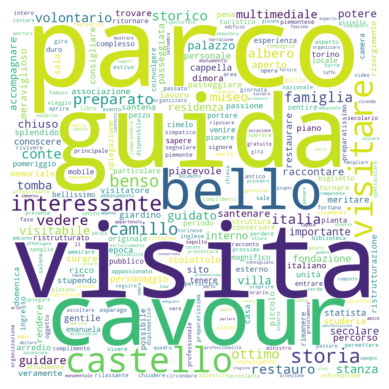

<Figure size 640x480 with 0 Axes>

In [21]:
# WORDCLOUD

# funzione per dimensione parole in base alla frequenza
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # conteggio frequenze
    for text in sentence.split(" "):
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text):
    wc = WordCloud(background_color = "white", max_words = 300, width = 1200, height = 1200)
    # creazione word cloud
    wc.generate_from_frequencies(text)
    wc.to_file("./Export/wordCloudCavour.png")


    # stampa word cloud
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
    plt.savefig("./Export/wordCloudCavour.png", format = "png")


textWC = " ".join(str(i) for i in MemCav_clean["testo"]) # trasformazione in stringa
makeImage(getFrequencyDictForText(textWC))

In [9]:
# FREQUENZA PAROLE

freq_cavour = MemCav_clean.testo.str.split(expand=True).stack().value_counts().reset_index() 
freq_cavour.columns = ['Termine', 'Frequenza'] 


# SUBSET 30 parole più frequenti 
freq_cavour_subset = freq_cavour.sort_values('Frequenza', ascending = False).iloc[:30]


# grafico
import seaborn as sns

fig = plt.figure(figsize = (20, 10))
plot = sns.barplot(x = "Termine", y = "Frequenza", data = freq_cavour_subset.sort_values('Frequenza', ascending = False), palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green'])    
plot.set_xticklabels(rotation = 80, fontsize = 16, labels = freq_cavour_subset.sort_values('Frequenza', ascending = False).Termine) # etichette parole

plt.bar_label(plot.containers[0], fontsize = 12) # label sopra gli assi

plt.title("Parole più frequenti del Memoriale Cavour su Google Maps e TripAdvisor", y = 1.07, fontsize = 17)

plt.savefig("./Export/FreqWordCavour.png", format = "png", dpi=600, bbox_inches = "tight")


freq_cavour.to_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Memoriale Cavour/Export/FreqParole_Cavour.xlsx")

NameError: name 'MemCav_clean' is not defined

In [18]:
# lista di parole da eliminare da LDA perchè poco caratteristiche

no_tipical_word = [
    "museo", "auto", "automobile", "macchina", "motore", 
    "visitare", "vedere", "vista", "esposizione", "mostra",
    "torino", "automobilistico", "italiano", "visita", "car",
    "cars", "vettura"
    ]
remove = r'\b(?:{})\b'.format('|'.join(no_tipical_word))

MemCav_cleanLDA = MemCav_clean["testo"].str.replace(remove, '')


/var/folders/0s/04xm91d10s387g138h0pvdrc0000gn/T/ipykernel_4484/3223458819.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  Mauto_cleanLDA = Mauto_clean["testo"].str.replace(remove, '')


In [2]:
# LDA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation 

cv = CountVectorizer()
dtm = cv.fit_transform(MemCav_clean["testo"]) 

# creazione di un modello impostando di default i parametri che vogliamo
LDA = LatentDirichletAllocation(n_components = 5, n_jobs = -1) # funzione per specificare il numero di cluster
LDA.fit(dtm)


for index, topic in enumerate(LDA.components_):
    print(f"TOPIC %d - TOP 30 PAROLE DEL CLUSTER" % (index+1))
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-30:]])
    print('\n')

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [4]:
# creazione e addestramento 2° modello LDA con parametri diversi

LDA2 = LatentDirichletAllocation(learning_decay = 0.9, n_components = 3)

LDA2.fit(dtm)


for index, topic in enumerate(LDA2.components_):
    print(f"TOPIC %d - TOP 30 PAROLE DEL CLUSTER" % (index+1))
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-30:]])
    print('\n')


# VALUTAZIONE MODELLO LDA

# Log Likelyhood: Higher the better
#print("Log Likelihood: ", LDA.score(dtm))

# Perplexity: Lower the better
#print("Perplexity: ", LDA.perplexity(dtm))
#print("\n")

# See model parameters
# print(LDA.get_params())


# perplexity might not be the best measure to evaluate topic models 
# because it doesn’t consider the context and semantic associations between words.

LatentDirichletAllocation(learning_decay=0.9, n_components=3)

TOPIC 1 - TOP 30 PAROLE DEL CLUSTER
['al', 'ai', 'sono', 'nel', 'dei', 'torino', 'ma', 'delle', 'anche', 'più', 'della', 'con', 'le', 'una', 'del', 'si', 'automobile', 'da', 'in', 'storia', 'non', 'dell', 'il', 'per', 'museo', 'auto', 'che', 'la', 'un', 'di']


TOPIC 2 - TOP 30 PAROLE DEL CLUSTER
['davvero', 'ma', 'automobile', 'ci', 'visitare', 'vedere', 'bellissimo', 'storia', 'visita', 'il', 'dell', 'in', 'bello', 'anche', 'una', 'interessante', 'le', 'sono', 'ben', 'con', 'che', 'per', 'un', 'auto', 'non', 'da', 'la', 'museo', 'molto', 'di']


TOPIC 3 - TOP 30 PAROLE DEL CLUSTER
['della', 'come', 'vetture', 'al', 'automobili', 'questo', 'visita', 'del', 'se', 'più', 'ci', 'anche', 'da', 'ma', 'si', 'le', 'non', 'sono', 'che', 'una', 'molto', 'con', 'museo', 'in', 'auto', 'la', 'per', 'il', 'un', 'di']




In [21]:
'''''

# OTTIMIZZAZIONE BEST PARAMETRI PER MODELLO LDA


# Define Search Param
search_params = {'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20], 'learning_decay': [0.1, 0.3, 0.5, 0.7, 0.9]}

# creazione modello LDA ottimizzato per applicarci la ricerca dei best parametri
LDA_definitivo = LatentDirichletAllocation(max_iter = 5, learning_method = 'online', learning_offset = 50.,random_state = 0)

# creazione modello GridSearchCV per trovare best parametri dandogli un set di parametri tra cui scegliere
model = GridSearchCV(LDA_definitivo, param_grid = search_params)

# addestramento modello
model.fit(dtm)

# output best parametri del modello 
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(dtm))

'''''

'\'\'\n\n# OTTIMIZZAZIONE BEST PARAMETRI PER MODELLO LDA\n\n\n# Define Search Param\nsearch_params = {\'n_components\': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20], \'learning_decay\': [0.1, 0.3, 0.5, 0.7, 0.9]}\n\n# creazione modello LDA ottimizzato per applicarci la ricerca dei best parametri\nLDA_definitivo = LatentDirichletAllocation(max_iter = 5, learning_method = \'online\', learning_offset = 50.,random_state = 0)\n\n# creazione modello GridSearchCV per trovare best parametri dandogli un set di parametri tra cui scegliere\nmodel = GridSearchCV(LDA_definitivo, param_grid = search_params)\n\n# addestramento modello\nmodel.fit(dtm)\n\n# output best parametri del modello \nbest_lda_model = model.best_estimator_\n\n# Model Parameters\nprint("Best Model\'s Params: ", model.best_params_)\n\n# Log Likelihood Score\nprint("Best Log Likelihood Score: ", model.best_score_)\n\n# Perplexity\nprint("Model Perplexity: ", best_lda_model.perplexity(dtm))\n\n'

In [34]:
# Document — Cluster Matrix
DocClusterMatrix = LDA2.transform(dtm) # ---- CAMBIARE QUI "LDA" con "best_lda_model" se si vuole usare modello con parametri ottimizzati ----

# colonna cluster
topicnames = ["Coeff Cluster " + str(i+1) for i in range(LDA2.n_components)] # ---- CAMBIARE QUI "LDA" con "best_lda_model" se si vuole usare modello con parametri ottimizzati ----

# colonna recensioni
#docnames = ["Recensione " + str(i) for i in range(len(GMmauto_clean))]
docnames = Cav["testo"] # dataset con recensioni "leggibili"


# Make the pandas dataframe
MemCav_document_topic = pd.DataFrame(np.round(DocClusterMatrix, 2), columns = topicnames, index = docnames)

# colonna migliore cluster della recensione
dominant_topic = np.argmax(MemCav_document_topic.values, axis = 1)+1
MemCav_document_topic["Cluster"] = dominant_topic


# Styling
def color(val):
 color = "white" if val > 0.0001 and val < 1 else "red"
 return "color: {col}".format(col = color)



# Apply Style
MemCav_document_topic.head(20).style.applymap(color)



# export cluster e recensioni di appartenenza
MemCav_document_topic.to_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Memoriale Cavour/Export/CavourOccorrenzeTopic.xlsx", columns = ["Cluster"])

,Coeff Cluster 1,Coeff Cluster 2,Coeff Cluster 3,Cluster
testo,,,,
"Interessante e molto ben conservato, consigliata una visita",0.840000,0.080000,0.090000,1
Spettacolare! La guida che ci ha accompagnato era brillante e preparata ed è stato un vero piacere ascoltarla. Consigliatissimo!,0.190000,0.770000,0.040000,2
"Senza Cavour probabilmente l Italia non sarebbe mai esistita se non geograficamente parlando. Di conseguenza questo posto va assolutamente visitato. La visita dura un ora e mezza circa. Guide preparatissime e mai banali, che riescono a coinvolgere grandi e piccini. Consigliata la prenotazione soprattutto nei giorni festivi.",0.020000,0.030000,0.950000,3
"Perla del ns paese! Consiglio a tutti di visitare questo museo e per seguire sorseggiate una cioccolata calda e passeggiate nel ns bellissimo parco, pittoresco in ogni stagione ma l autunno è la mia preferita",0.030000,0.950000,0.020000,2
Sono stata soddisfatta . E questa primavera tornerò questa primavera...,0.100000,0.080000,0.820000,3
"Casa museo, bellissima la prima sala e la camera da letto di Camillo Benso. Alcune stanze poco allestite e con decori lanterne in ottone moderne che nulla hanno a che vedere con il contesto. Visto il materiale e la location, sarebbe meglio dare la giusta importanza alle stanze con decori adeguati e d epoca. La nostra guida troppo prolissa ma molto preparata ascoltare per 15 mn e più in ogni stanza e in piedi, risulta stancante Sicuramente da vedere",0.860000,0.010000,0.130000,1
"Il castello è meritevole e interessante da visitare, ma la guida turistica un po pessima. Non aveva nessuna voglia di essere lì, in certi momenti regalava sguardi pensando di non essere osservata che facevano ben capire la sua svogliatezza. Oltretutto non doveva nemmeno impegnarsi molto visto che la visita avviene tramite dei video che faceva partire in ogni stanza. La visita è stata abbastanza lunga e per quanto sono realizzati bene i video presentati, un taglio sarebbe stato gradito perché erano molto lunghi e articolati. Oltrettutto abbiamo avuto la sfortuna di recarci il 20 settembre quando era impossibile entrare per via di un evento con il ministro Brunetta, fortunatamente siamo riusciti entrare qualche ora dopo ma sarebbe gradito far presente che il sito è chiuso visto che queste manifestazioni sono pure annuali .",0.010000,0.980000,0.010000,2
Una piacevolissima scoperta! Un ringraziamento speciale alla guida molto preparata Struttura molto ben conservata e con un bel giardino dove passeggiare e godersi un po di relax. Consiglio!,0.950000,0.030000,0.030000,1
Molto interessante,0.600000,0.200000,0.200000,1


In [35]:
# Topic-Keyword Matrix
MemCav_topic_keywords = pd.DataFrame(LDA2.components_) # ---- CAMBIARE QUI "LDA" con "best_lda_model" se si vuole ottimizzare i parametri ----

# Assign Column and Index
MemCav_topic_keywords.columns = cv.get_feature_names_out()
MemCav_topic_keywords.index = topicnames

MemCav_topic_keywords.head()

,abbandonata,abbandonato,abbandono,abbonamento,abbonato,abbondo,abeto,abile,abilità,abitare,...,volere,volontariato,volontario,volonteroso,volto,voumo,xavier,xche,zanzara,zona
Coeff Cluster 1,0.333433,0.333433,0.333433,0.333425,0.333358,0.333397,0.333479,0.333376,0.333424,0.333553,...,0.333393,0.333433,0.420310,0.333491,0.333454,0.333465,0.333407,0.333376,1.331876,1.330176
Coeff Cluster 2,0.333458,0.333458,0.333453,0.333411,0.333360,0.333414,0.333497,1.333267,1.333189,1.334141,...,0.333400,0.333458,0.343622,0.333470,0.333468,1.306587,0.333422,1.333267,0.334380,0.333832
Coeff Cluster 3,1.333110,1.333110,1.333114,5.333163,2.333282,1.333189,1.333024,0.333357,0.333387,3.332306,...,2.333208,1.333110,27.236068,1.333039,1.333078,0.359948,1.333171,0.333357,0.333744,2.335992


In [36]:
# Creazione grafico

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

number_topics = 3
count_data = dtm


A = len(cv.get_feature_names_out())

LDAvis_data_filepath = os.path.join('./Export/Cavour' + str(number_topics))

# this is a bit time consuming - make the if statement True
# if you want to execute visualization prep yourself

if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(LDA2, dtm, cv, mds = 'mmds')
    #print (LDAvis_prepared)
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared,f,0)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './Export/Cavour'+ str(number_topics) +'.html')

count_data = cv.fit_transform(MemCav_clean["testo"])
#print(count_data)

/Users/Emanuele/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/Emanuele/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [40]:
MemCavNetwork = [word.lower().split() for word in MemCav_clean["testo"]]

MemCavNetwork = [[w for w in word]
                 for word in MemCavNetwork]

In [41]:
from nltk import bigrams

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(word)) for word in MemCavNetwork]

# View bigrams for the first tweet
terms_bigram[0]

[('interessante', 'conservato'),
 ('conservato', 'visita'),
 ('visita', 'consigliare')]

In [43]:
import itertools
import collections

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_df = pd.DataFrame(bigram_counts.most_common(50), columns = ['word', 'count'])

bigram_df.to_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Memoriale Cavour/Export/Bigram_Cavour.xlsx")

bigram_df.head(10)

,word,count
0,"(visita, bello)",33
1,"(guida, restauro)",15
2,"(interessante, visita)",12
3,"(interessante, visitare)",10
4,"(storia, interessante)",9
5,"(preparato, castello)",9
6,"(bello, preparato)",8
7,"(scoiattolo, parco)",8
8,"(benso, camillo)",7
9,"(ottimo, guida)",7


In [28]:
'''''
# NETWORK ANALYSIS 2

import networkx as nx
from pyvis.network import Network

FromToNetworkAnalysis = pd.read_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Museo Automobile/Export/FromToNetworkAnalysis.xlsx", usecols = ["from", "to", "count"]) # lettura dataset


G = nx.from_pandas_edgelist(FromToNetworkAnalysis, source = "from", target = "to", edge_attr = "count")


print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))

# create vis network
net = Network(notebook = True, height="750px", width="100%")
net.toggle_hide_edges_on_drag(True)
net.from_nx(G)
net.show_buttons(filter_= True)
net.toggle_physics(True)



net.show("/Users/Emanuele/Desktop/TesiMaster/Dati/Museo Automobile/Export/Network2.html")
'''''

'\'\'\n#\xa0NETWORK ANALYSIS 2\n\nimport networkx as nx\nfrom pyvis.network import Network\n\nFromToNetworkAnalysis = pd.read_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Museo Automobile/Export/FromToNetworkAnalysis.xlsx", usecols = ["from", "to", "count"]) # lettura dataset\n\n\nG = nx.from_pandas_edgelist(FromToNetworkAnalysis, source = "from", target = "to", edge_attr = "count")\n\n\nprint("No of unique characters:", len(G.nodes))\nprint("No of connections:", len(G.edges))\n\n# create vis network\nnet = Network(notebook = True, height="750px", width="100%")\nnet.toggle_hide_edges_on_drag(True)\nnet.from_nx(G)\nnet.show_buttons(filter_= True)\nnet.toggle_physics(True)\n\n\n\nnet.show("/Users/Emanuele/Desktop/TesiMaster/Dati/Museo Automobile/Export/Network2.html")\n'

In [44]:
# NETWORK ANALYSIS 2 NIGHT

from pyvis.network import Network
import pandas as pd
import matplotlib.pyplot as plt


# set the physics layout of the network
got_data = pd.read_excel("/Users/Emanuele/Desktop/TesiMaster/Dati/Memoriale Cavour/Export/FromToNetworkAnalysis_Cavour.xlsx")


net = Network(height="1500px", width="100%", bgcolor='#222222', font_color="#ffffff")


net.toggle_hide_edges_on_drag(True)
net.show_buttons(filter_= True)
net.toggle_physics(True)

sources = got_data['from']
targets = got_data['to']
weights = got_data['count']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    net.add_node(src, src, title = src, color = '#87cce5')
    net.add_node(dst, dst, title = dst, color = '#6ca3b7')
    net.add_edge(src, dst, value = w, color = "#dbf0f7")

print("No of unique characters:", len(net.nodes))
print("No of connections:", len(net.edges))

neighbor_map = net.get_adj_list() # restituisce una lista di nodi adiacenti

# label del nodo
for node in net.nodes:
    node['title'] = node['title'] + ' --> ' + ' - '.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

net.show("./Export/prova.html")


No of unique characters: 48
No of connections: 49


In [30]:
'''''

# NETWORK ANALYSIS 1

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx


# Create dictionary of bigrams and their counts
d = bigram_df.set_index('word').T.to_dict('records')


# Create network plot 
G = nx.Graph()


# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight = (v * 10))


fig, ax = plt.subplots(figsize = (16, 12))

pos = nx.spring_layout(G, k = 2)


node_sizes = [3 + 10 * i for i in range(len(G))]

M = G.number_of_edges()

edge_colors = range(2, M + 2)

edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

# Plot networks
nodes = nx.draw_networkx_nodes(G, pos, node_size = node_sizes, node_color = "#A0CBE2")
edges = nx.draw_networkx_edges(G, pos, node_size = node_sizes, edge_color = edge_colors, edge_cmap = cmap, width = 2, alpha = 0.6)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.0135, value[1]+.045
    ax.text(x, y,
            s = key,
            bbox = dict(facecolor = 'white', alpha = 0.15),
            horizontalalignment = 'center', fontsize = 10)


# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Network Analysis Museo dell'Automobile", font)

# colorbar
plt.axis("off")
colors=range(20)
vmin = min(colors)
vmax = max(colors)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)


plt.show()

'''''

'\'\'\n\n#\xa0NETWORK ANALYSIS 1\n\nimport matplotlib as mpl\nimport matplotlib.pyplot as plt\nimport networkx as nx\n\n\n# Create dictionary of bigrams and their counts\nd = bigram_df.set_index(\'word\').T.to_dict(\'records\')\n\n\n# Create network plot \nG = nx.Graph()\n\n\n# Create connections between nodes\nfor k, v in d[0].items():\n    G.add_edge(k[0], k[1], weight = (v * 10))\n\n\nfig, ax = plt.subplots(figsize = (16, 12))\n\npos = nx.spring_layout(G, k = 2)\n\n\nnode_sizes = [3 + 10 * i for i in range(len(G))]\n\nM = G.number_of_edges()\n\nedge_colors = range(2, M + 2)\n\nedge_alphas = [(5 + i) / (M + 4) for i in range(M)]\ncmap = plt.cm.plasma\n\n# Plot networks\nnodes = nx.draw_networkx_nodes(G, pos, node_size = node_sizes, node_color = "#A0CBE2")\nedges = nx.draw_networkx_edges(G, pos, node_size = node_sizes, edge_color = edge_colors, edge_cmap = cmap, width = 2, alpha = 0.6)\n\n# Create offset labels\nfor key, value in pos.items():\n    x, y = value[0]+.0135, value[1]+.045\

In [45]:
from feel_it import EmotionClassifier, SentimentClassifier

sentiment_classifier = SentimentClassifier()
emotion_classifier = EmotionClassifier()

print(emotion_classifier.predict(Cav["testo"].values.tolist()))
print(emotion_classifier.predict(Cav["testo"].values.tolist()))

/Users/Emanuele/opt/anaconda3/lib/python3.9/site-packages/packaging/version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


Downloading:   0%|          | 0.00/847 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

: 

: 